In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df= pd.read_csv('fct_invoice.csv')
jsondf = pd.read_json("dim_customer.json")
df3=pd.merge(df,jsondf,left_on="customer_id",right_on="id")

df3

,invoice_no,customer_id,category,quantity,price,payment_method,invoice_date,shopping_mall,age,first_name,gender,id,last_name
0,I138884,229,Clothing,5,1500.40,Credit Card,5/8/2022,Kanyon,NaN,William,M,229,Anderson
1,I126377,229,Cosmetics,2,81.32,Credit Card,5/4/2021,Metrocity,NaN,William,M,229,Anderson
2,I178419,229,Shoes,3,1800.51,Debit Card,1/6/2021,Istinye Park,NaN,William,M,229,Anderson
3,I847727,229,Clothing,3,900.24,Credit Card,21/08/2022,Zorlu Center,NaN,William,M,229,Anderson
4,I219251,229,Shoes,5,3000.85,Credit Card,23/06/2022,Istinye Park,NaN,William,M,229,Anderson
...,...,...,...,...,...,...,...,...,...,...,...,...,...
99452,I198027,4973,Shoes,1,600.17,Cash,8/11/2021,Kanyon,NaN,Melissa,F,4973,Bell
99453,I989120,6161,Books,5,75.75,Cash,8/1/2021,Viaport Outlet,36.0,Leslie,F,6161,Bass
99454,I791963,6779,Clothing,5,1500.40,Credit Card,6/3/2021,Metropol AVM,NaN,Kelly,F,6779,Roberts
99455,I100582,8386,Clothing,2,600.16,Cash,2/11/2021,Istinye Park,47.0,Shawn,M,8386,Perez


Easy
1. How many unique customers are in the dataset?

In [3]:
unique_customer=jsondf["id"].nunique()
print("There are",unique_customer,"unique customers in the dataset")

There are 5191 unique customers in the dataset


2. What are the different categories of products available? How many unique categories are there?

In [4]:
numcat=len(df["category"].unique())
cat=df["category"].unique()

print(f"There are {numcat} unique categories namely {cat}")

There are 8 unique categories namely ['Clothing' 'Shoes' 'Books' 'Cosmetics' 'Food & Beverage' 'Toys'
 'Technology' 'Souvenir']


3. Which payment method is the most popular? How many times was it used?

In [15]:
mostpop=df["payment_method"].value_counts().idxmax()
timesused=df["payment_method"].value_counts().max()

print(f"The most popular payment method is {mostpop} that has been used {timesused} times.")

The most popular payment method is Cash that has been used 44447 times.


Medium
1. What are the three most popular categories, by total sales?

In [167]:
df["total rev"]=df["quantity"]*df["price"]

df

,invoice_no,customer_id,category,quantity,price,payment_method,invoice_date,shopping_mall,total rev
0,I138884,229,Clothing,5,1500.40,Credit Card,5/8/2022,Kanyon,7502.00
1,I317333,3433,Shoes,3,1800.51,Debit Card,12/12/2021,Forum Istanbul,5401.53
2,I127801,644,Clothing,1,300.08,Cash,9/11/2021,Metrocity,300.08
3,I173702,4900,Shoes,5,3000.85,Credit Card,16/05/2021,Metropol AVM,15004.25
4,I337046,1089,Books,4,60.60,Cash,24/10/2021,Kanyon,242.40
...,...,...,...,...,...,...,...,...,...
99452,I219422,2344,Souvenir,5,58.65,Credit Card,21/09/2022,Kanyon,293.25
99453,I325143,172,Food & Beverage,2,10.46,Cash,22/09/2021,Forum Istanbul,20.92
99454,I824010,425,Food & Beverage,2,10.46,Debit Card,28/03/2021,Metrocity,20.92
99455,I702964,577,Technology,4,4200.00,Cash,16/03/2021,Istinye Park,16800.00


In [168]:
sum_by_category=df.groupby("category")["total rev"].sum()
sorted_sum_by_category = sum_by_category.sort_values(ascending=False)[0:3]

sorted_sum_by_category

category
Clothing      1.139968e+08
Shoes         6.655345e+07
Technology    5.786235e+07
Name: total rev, dtype: float64

2. What are the total sales attributed to customers over the age of 45?

In [169]:
df4=df3[df3['age'] > 45]
df4["total rev"]=df4["quantity"]*df4["price"]

df4

/var/folders/v9/hxr8rxzs6f1csxfvlm4dvc0c0000gn/T/ipykernel_37325/169877968.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df4["total rev"]=df4["quantity"]*df4["price"]


,invoice_no,customer_id,category,quantity,price,payment_method,invoice_date,shopping_mall,age,first_name,gender,id,last_name,total rev
83,I127801,644,Clothing,1,300.08,Cash,9/11/2021,Metrocity,46.0,Christopher,M,644,Stephens,300.08
84,I198233,644,Cosmetics,4,162.64,Cash,13/02/2023,Metropol AVM,46.0,Christopher,M,644,Stephens,650.56
85,I225178,644,Clothing,5,1500.40,Credit Card,10/2/2021,Kanyon,46.0,Christopher,M,644,Stephens,7502.00
86,I310772,644,Shoes,5,3000.85,Cash,19/05/2021,Istinye Park,46.0,Christopher,M,644,Stephens,15004.25
87,I712882,644,Clothing,4,1200.32,Cash,21/04/2022,Istinye Park,46.0,Christopher,M,644,Stephens,4801.28
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99441,I981269,4249,Shoes,5,3000.85,Debit Card,22/07/2021,Mall of Istanbul,73.0,Tina,F,4249,Morgan,15004.25
99444,I154835,8889,Toys,3,107.52,Cash,29/08/2021,Mall of Istanbul,48.0,Chad,M,8889,Hooper,322.56
99449,I251260,4090,Souvenir,5,58.65,Credit Card,25/11/2022,Kanyon,80.0,Melissa,F,4090,Fuller,293.25
99455,I100582,8386,Clothing,2,600.16,Cash,2/11/2021,Istinye Park,47.0,Shawn,M,8386,Perez,1200.32


In [170]:
sum_45=df4["total rev"].sum()
print(f"The total sales attributed to customers over the age of 45 is Php {sum_45}.")

The total sales attributed to customers over the age of 45 is Php 82039768.15.


3. How is the data distributed across different invoice dates? Are there any seasonal trends or patterns? (Use a graph for this.)

/var/folders/v9/hxr8rxzs6f1csxfvlm4dvc0c0000gn/T/ipykernel_37325/2357562635.py:5: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df3['invoice_date'] = pd.to_datetime(df3['invoice_date'])


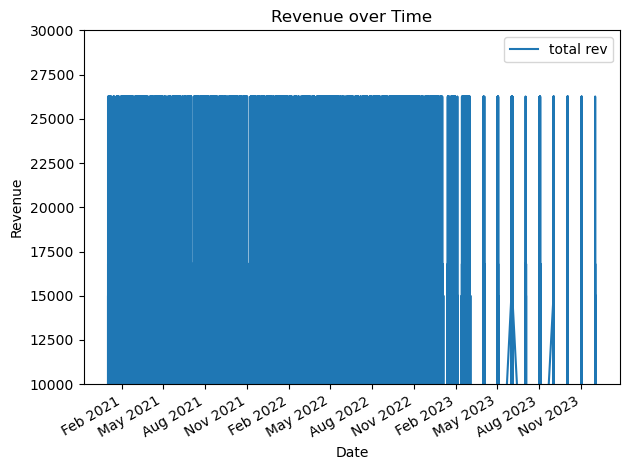

In [171]:
import datetime
import matplotlib.dates as mdates

df3["total rev"] = df3["price"] * df3['quantity']
df3['invoice_date'] = pd.to_datetime(df3['invoice_date'])

# Plotting
ax = df3.plot(x='invoice_date', y='total rev')

# Formatting x-axis as dates
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=3))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))
plt.ylim(10000,30000)

plt.xlabel('Date')
plt.ylabel('Revenue')
plt.title('Revenue over Time')

plt.tight_layout()
plt.show()


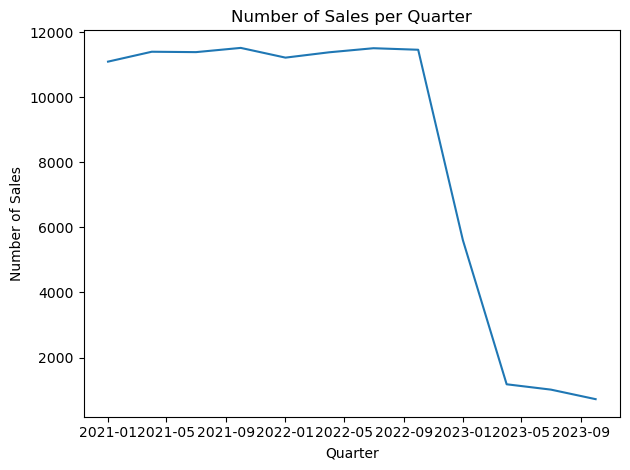

In [172]:
#number of sales (y-axis) in quarters
df3['invoice_date'] = pd.to_datetime(df3['invoice_date'])
df3['Quarter'] = df3['invoice_date'].dt.to_period('Q')

# Count number of sales in each quarter
sales_per_quarter = df3.groupby('Quarter').size()

# Convert Period index to Datetime index
sales_per_quarter.index = sales_per_quarter.index.to_timestamp()
# Plotting
plt.plot(sales_per_quarter.index, sales_per_quarter.values)

ax.xaxis.set_major_locator(mdates.MonthLocator(interval=3))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y Q%q'))

plt.xlabel('Quarter')
plt.ylabel('Number of Sales')
plt.title('Number of Sales per Quarter')

plt.tight_layout()
plt.show()

Hard
1. Create a pivot table showing the breakdown of sales across these dimensions, in this order: category, decade age range (e.g., 10-19, 20-29, and so forth).

In [173]:
age_bins = range(0, 101, 10)
age_labels = [f'{i}-{i+9}' for i in range(0, 100, 10)]
df3['Age Group'] = pd.cut(df3['age'], bins=age_bins, labels=age_labels)

df3

,invoice_no,customer_id,category,quantity,price,payment_method,invoice_date,shopping_mall,age,first_name,gender,id,last_name,total rev,Quarter,Age Group
0,I138884,229,Clothing,5,1500.40,Credit Card,2022-05-08,Kanyon,NaN,William,M,229,Anderson,7502.00,2022Q2,NaN
1,I126377,229,Cosmetics,2,81.32,Credit Card,2021-05-04,Metrocity,NaN,William,M,229,Anderson,162.64,2021Q2,NaN
2,I178419,229,Shoes,3,1800.51,Debit Card,2021-01-06,Istinye Park,NaN,William,M,229,Anderson,5401.53,2021Q1,NaN
3,I847727,229,Clothing,3,900.24,Credit Card,2022-08-21,Zorlu Center,NaN,William,M,229,Anderson,2700.72,2022Q3,NaN
4,I219251,229,Shoes,5,3000.85,Credit Card,2022-06-23,Istinye Park,NaN,William,M,229,Anderson,15004.25,2022Q2,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99452,I198027,4973,Shoes,1,600.17,Cash,2021-08-11,Kanyon,NaN,Melissa,F,4973,Bell,600.17,2021Q3,NaN
99453,I989120,6161,Books,5,75.75,Cash,2021-08-01,Viaport Outlet,36.0,Leslie,F,6161,Bass,378.75,2021Q3,30-39
99454,I791963,6779,Clothing,5,1500.40,Credit Card,2021-06-03,Metropol AVM,NaN,Kelly,F,6779,Roberts,7502.00,2021Q2,NaN
99455,I100582,8386,Clothing,2,600.16,Cash,2021-02-11,Istinye Park,47.0,Shawn,M,8386,Perez,1200.32,2021Q1,40-49


In [174]:
pivot_table=pd.pivot_table(df3, values="total rev",index="category", columns="Age Group",aggfunc="count")
pivot_table

Age Group,0-9,10-19,20-29,30-39,40-49,50-59,60-69,70-79,80-89,90-99
category,,,,,,,,,,
Books,0,116,481,507,487,485,448,348,148,0
Clothing,0,895,3107,3441,3341,3247,3032,2382,1127,0
Cosmetics,0,376,1344,1638,1450,1426,1316,978,493,0
Food & Beverage,0,356,1341,1543,1493,1400,1326,965,453,0
Shoes,0,218,927,1024,996,930,809,715,306,0
Souvenir,0,148,439,496,485,452,411,308,160,0
Technology,0,142,442,531,513,407,475,320,141,0
Toys,0,250,925,1086,974,919,862,716,335,0
